In [1]:
#This is the python file for testing
from QPE import QPhe_qiskit
from qiskit.circuit.library.standard_gates import HGate

In [2]:
qphe=QPhe_qiskit(3, 3)
qphe.set_unitary([(HGate(), [0])])
qphe.construct_circuit()
qphe.compute_result()  

In [3]:
circuit=qphe.circuit

C:\Users\73747\PycharmProjects\DynamicCircuit\yalehack\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


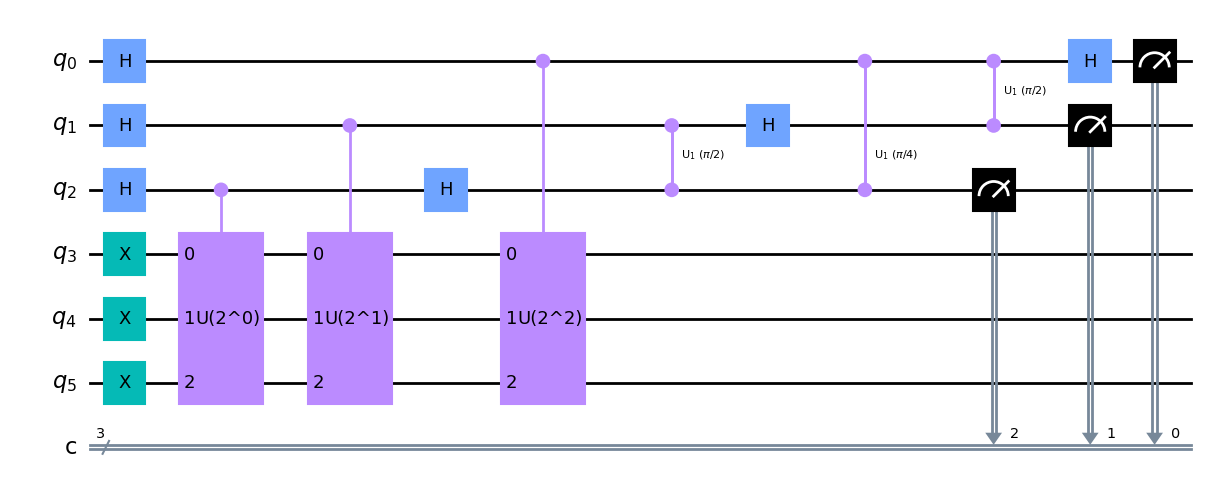

In [4]:
circuit.draw(output='mpl')

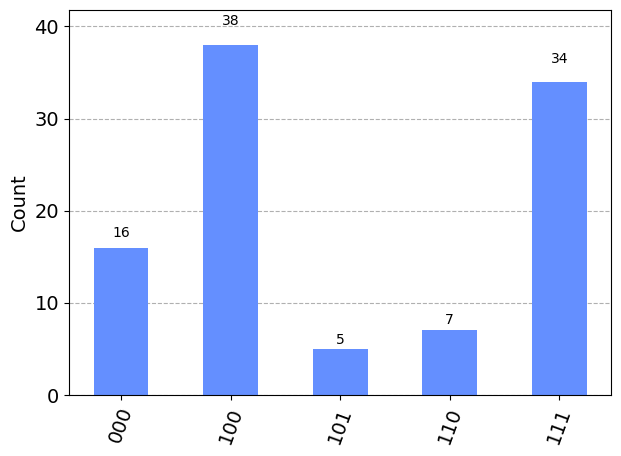

In [5]:
qphe.show_measure_all(100)

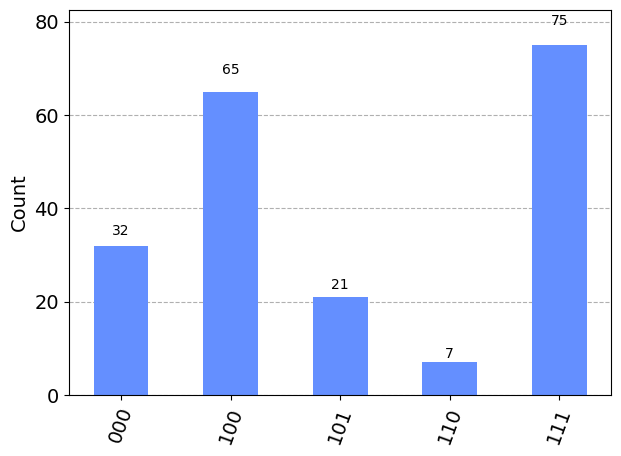

In [6]:
qphe.show_measure_all(200)

In [8]:
from noise import *

noise_model=construct_bitflip_noise_model(0.1, 0.1, 0.1)

NameError: name 'construct_noise_model' is not defined

NNN


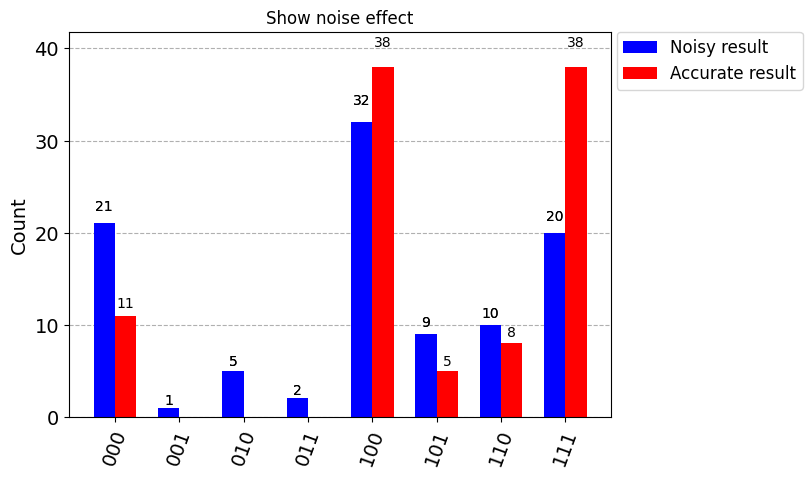

In [9]:
qphe.add_noise_model(noise_model)
qphe.show_noise_effect(100)

In [1]:
from QEC.QECCode import QECCode

qec_code=QECCode(3,2,2)
    
qec_code.set_stabilizers(["ZZI","IZZ"])
qec_code.construct_syndrome_table()
qec_code.show_syndrome_table()

Error: III distance is 0 self._distance is 2
Error: IIX distance is 1 self._distance is 2
Error: IIZ distance is 1 self._distance is 2
Error: 00->IIZ is not unique
Error: IXI distance is 1 self._distance is 2
Error: IXX distance is 2 self._distance is 2
Error: IXZ distance is 2 self._distance is 2
Error: 11->IXZ is not unique
Error: IZI distance is 1 self._distance is 2
Error: 00->IZI is not unique
Error: IZX distance is 2 self._distance is 2
Error: 01->IZX is not unique
Error: IZZ distance is 2 self._distance is 2
Error: 00->IZZ is not unique
Error: XII distance is 1 self._distance is 2
Error: 10->XII is not unique
Error: XIX distance is 2 self._distance is 2
Error: 11->XIX is not unique
Error: XIZ distance is 2 self._distance is 2
Error: 10->XIZ is not unique
Error: XXI distance is 2 self._distance is 2
Error: 01->XXI is not unique
Error: XXX distance is 3 self._distance is 2
Error: XXZ distance is 3 self._distance is 2
Error: XZI distance is 2 self._distance is 2
Error: 10->XZI is n

In [2]:
qec_code.construct_circuit_stabilizer("ZZI",0)

In [3]:
#qec_code.construct_circuit_stabilizer("XZ",0)
#qec_code.construct_correction_circuit("10")
#qec_code.construct_circuit_stabilizer("IX",0)
qec_code.test_stabilizer_circuit(errorstr="01",stabstr="ZZI",stabindex=0)

The result is: 00


KeyError: '01'

In [7]:
qec_code._error_table

{'00': 'II', '10': 'IX', '01': 'IZ', '11': 'ZZ'}

In [5]:
circuit=qec_code._circuit

C:\Users\73747\PycharmProjects\DynamicCircuit\yalehack\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


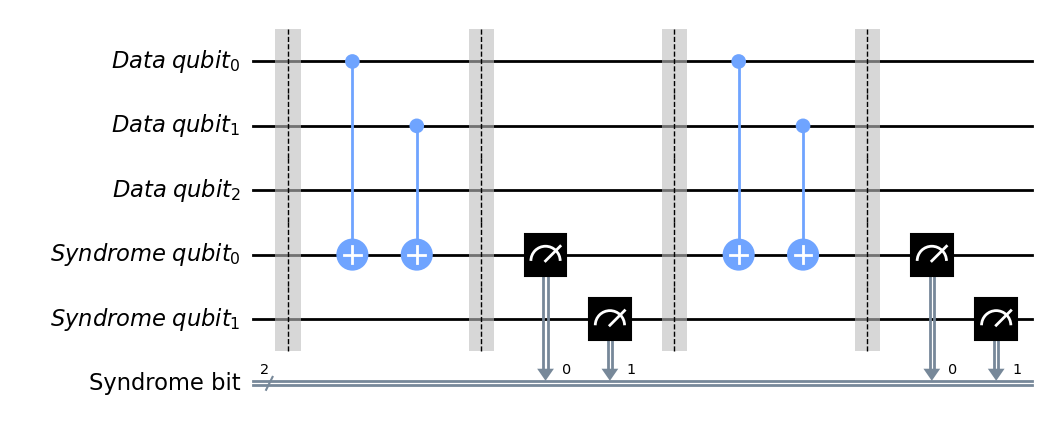

In [6]:
circuit.draw(output='mpl')

In [11]:
from QEC.repetition import bitfliprepetitioncode

In [12]:
rep=bitfliprepetitioncode(3)

In [13]:
rep.construct_syndrome_table()
rep.show_syndrome_table()

Error: III distance is 0 self._distance is 1
Error: IIX distance is 1 self._distance is 1
Error: IXI distance is 1 self._distance is 1
Error: IXX distance is 2 self._distance is 1
Error: XII distance is 1 self._distance is 1
Error: XIX distance is 2 self._distance is 1
Error: XXI distance is 2 self._distance is 1
Error: XXX distance is 3 self._distance is 1
The syndrome table is:
III->00
IIX->01
IXI->11
XII->10
The error table is:
00->III
01->IIX
11->IXI
10->XII


In [14]:
rep.test_fidelity(["IIX"],shots=100)

The result is: 01 000
{'000 10': 100}


{'000 10': 100}

In [5]:
#rep.construct_circuit()
circuit=rep.circuit

C:\Users\73747\PycharmProjects\DynamicCircuit\yalehack\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


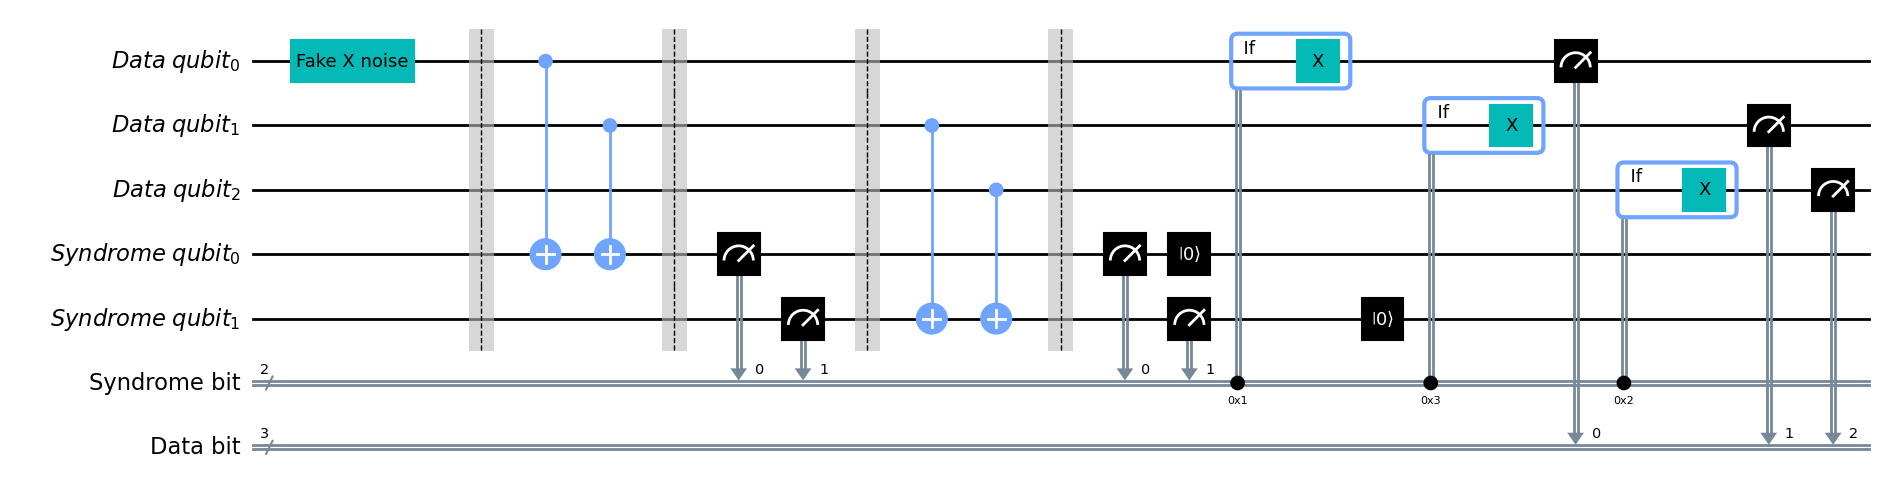

In [6]:
circuit.draw(output='mpl')

In [4]:
rep.test_fidelity(errorstrlist=["XII"],shots=100)

The result is: 10 000
{'000 01': 100}


{'000 01': 100}

In [4]:
rep.test_stabilizer_circuit("XII","ZZI",0)

The result is: 10
The expected rsult is 10


In [6]:
rep.test_stabilizer_circuit("XII","IZZ",1)

The result is: 00
The expected rsult is 10


In [2]:
from QEC.repetition import bitfliprepetitioncode
from noise import construct_bitflip_noise_model,construct_phaseflip_noise_model



rep=bitfliprepetitioncode(5)
noisemode=construct_bitflip_noise_model(0.01,0.01,0.01)
rep.construct_syndrome_table()
rep.show_syndrome_table()    
rep.add_noise_model(noisemode)

fidelity=rep.show_noise_effect(shots=100)

['ZZIII', 'IZZII', 'IIZZI', 'IIIZZ']
Error: IIIII distance is 0 self._distance is 2
Error: IIIIX distance is 1 self._distance is 2
Error: IIIXI distance is 1 self._distance is 2
Error: IIIXX distance is 2 self._distance is 2
Error: IIXII distance is 1 self._distance is 2
Error: IIXIX distance is 2 self._distance is 2
Error: IIXXI distance is 2 self._distance is 2
Error: IIXXX distance is 3 self._distance is 2
Error: IXIII distance is 1 self._distance is 2
Error: IXIIX distance is 2 self._distance is 2
Error: IXIXI distance is 2 self._distance is 2
Error: IXIXX distance is 3 self._distance is 2
Error: IXXII distance is 2 self._distance is 2
Error: IXXIX distance is 3 self._distance is 2
Error: IXXXI distance is 3 self._distance is 2
Error: IXXXX distance is 4 self._distance is 2
Error: XIIII distance is 1 self._distance is 2
Error: XIIIX distance is 2 self._distance is 2
Error: XIIXI distance is 2 self._distance is 2
Error: XIIXX distance is 3 self._distance is 2
Error: XIXII distance i

In [3]:
print(fidelity)

0.73


In [3]:
from QEC.repetition import bitfliprepetitioncode
from Algorithm.noise import construct_bitflip_noise_model,construct_phaseflip_noise_model



In [7]:
number_qubits=[3,5,7,9]
physical_errorrates=[0.001,0.0012,0.0014,0.0016,0.0018,0.002,0.0022,0.0024]
three_fidelity=[]
five_fidelity=[]
seven_fidelity=[]
nine_fidelity=[]
for num in number_qubits:
    for errorrate in physical_errorrates:
        rep=bitfliprepetitioncode(num)
        noisemode=construct_bitflip_noise_model(errorrate,errorrate,errorrate)
        rep.construct_syndrome_table()
        rep.show_syndrome_table()    
        rep.add_noise_model(noisemode)
        
        fidelity=rep.show_noise_effect(shots=100)    
        if num==3:
            three_fidelity.append(fidelity)
        if num==5:
            five_fidelity.append(fidelity)
        if num==7:
            seven_fidelity.append(fidelity)
        if num==9:
            nine_fidelity.append(fidelity)

['ZZI', 'IZZ']
Error: III distance is 0 self._distance is 1
Error: IIX distance is 1 self._distance is 1
Error: IXI distance is 1 self._distance is 1
Error: IXX distance is 2 self._distance is 1
Error: XII distance is 1 self._distance is 1
Error: XIX distance is 2 self._distance is 1
Error: XXI distance is 2 self._distance is 1
Error: XXX distance is 3 self._distance is 1
The syndrome table is:
III->00
IIX->01
IXI->11
XII->10
The error table is:
00->III
01->IIX
11->IXI
10->XII
['ZZI', 'IZZ']
Error: III distance is 0 self._distance is 1
Error: IIX distance is 1 self._distance is 1
Error: IXI distance is 1 self._distance is 1
Error: IXX distance is 2 self._distance is 1
Error: XII distance is 1 self._distance is 1
Error: XIX distance is 2 self._distance is 1
Error: XXI distance is 2 self._distance is 1
Error: XXX distance is 3 self._distance is 1
The syndrome table is:
III->00
IIX->01
IXI->11
XII->10
The error table is:
00->III
01->IIX
11->IXI
10->XII
['ZZI', 'IZZ']
Error: III distance i

In [5]:
import matplotlib.pyplot as plt

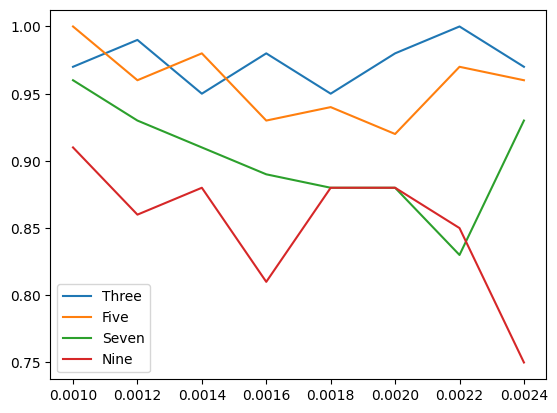

In [8]:
plt.plot(physical_errorrates,three_fidelity,label="Three")
plt.plot(physical_errorrates,five_fidelity,label="Five")
plt.plot(physical_errorrates,seven_fidelity,label="Seven")
plt.plot(physical_errorrates,nine_fidelity,label="Nine")
plt.legend()

In [ ]:
from test_cskim import SmallDynamicCircuit

n = 5
sd = SmallDynamicCircuit(n, n)

sd.construct_circuit(nbin)
sd.compute_result()